In [1]:
import transformers
import sys
import numpy as np
import pandas as pd
import umap

In [2]:
import torch
import matplotlib.pyplot as plt

In [20]:
from common import read, read_l

embeddings_fin=read("../../oscar-data/fin/fin_embeddings.txt", "embeddings")
labels_fin=read_l("../../oscar-data/fin/fin_labels.txt", "labels")
ids_fin=read_l("../../oscar-data/fin/fin_ids.txt", "ids")

In [21]:
embeddings_en=read("../../oscar-data/en/en_embeddings.txt", "embeddings")
labels_en=read_l("../../oscar-data/en/en_labels.txt", "labels")
ids_en=read_l("../../oscar-data/en/en_ids.txt", "ids")

In [22]:
embeddings_fr=read("../../oscar-data/fr/fr_embeddings.txt", "embeddings")
labels_fr=read_l("../../oscar-data/fr/fr_labels.txt", "labels")
ids_fr=read_l("../../oscar-data/fr/fr_ids.txt", "ids")

embeddings_tr=read("../../oscar-data/tr/tr_embeddings.txt", "embeddings")
labels_tr=read_l("../../oscar-data/tr/tr_labels.txt", "labels")
ids_tr=read_l("../../oscar-data/tr/tr_ids.txt", "ids")

In [44]:
#from common import top20
from collections import Counter

top_l_tr, top_e_tr = top20(embeddings_tr, labels_tr,5)
top_l_fr, top_e_fr = top20(embeddings_fr, labels_fr,5)
top_l_fin, top_e_fin = top20(embeddings_fin, labels_fin,5)
top_l_en, top_e_en = top20(embeddings_en, labels_en,5)

In [37]:
def filt(embeddings, labels,ids,regs,lang):
    i_to_keep = []
    l_to_keep = []
    e_to_keep=[]
    r_to_keep=regs.split("-")
    ids_to_keep = []
    lbs = []
    for ix, l in enumerate(labels):
       # print("LL",l)
        if l in r_to_keep:
        #    print("L",l)
            i_to_keep.append(ix)
            l_to_keep.append(lang+"_"+l)
            e_to_keep.append(embeddings[ix])
            ids_to_keep.append(ids[ix])
    return l_to_keep,e_to_keep,ids_to_keep

In [40]:
filt_l_fin,filt_e_fin, filt_i_fin = filt(embeddings_fin, labels_fin,ids_fin,"NA ne-NA sr-NA nb-IP ds-ID-OP rv","fin")
filt_l_en,filt_e_en, filt_i_en = filt(embeddings_en, labels_en,ids_en,"NA ne-NA sr-NA nb-IP ds-ID-OP rv","en")
filt_l_fr,filt_e_fr,filt_i_fr = filt(embeddings_fr, labels_fr,ids_fr,"NA ne-NA sr-NA nb-IP ds-ID-OP rv","fr")
filt_l_tr,filt_e_tr,filt_i_tr = filt(embeddings_tr, labels_tr,ids_tr,"NA ne-NA sr-NA nb-IP ds-ID-OP rv","tr")

print(filt_l_tr[19])
print(filt_i_tr[19])

ll = filt_l_en + filt_l_fin + filt_l_fr + filt_l_tr
em = filt_e_en + filt_e_fin + filt_e_fr + filt_e_tr
idx = filt_i_en + filt_i_fin + filt_i_fr + filt_i_tr
print(len(ll), len(em), len(idx))

tr_IP ds
4163317
20948 20948 20948


In [44]:
df = pd.DataFrame()
df['Labels'] = ll#[:100]
df['Ids'] = idx
print(df)

         Labels       Ids
0      en_NA ne  19743561
1      en_IP ds  18681111
2      en_NA nb  18362186
3      en_IP ds  12820869
4      en_NA sr  11159847
...         ...       ...
20943  tr_NA ne    268534
20944  tr_NA nb   1602929
20945  tr_IP ds    950138
20946  tr_NA ne   8295884
20947  tr_IP ds   3864316

[20948 rows x 2 columns]


In [79]:
mapper = umap.UMAP().fit(em)

In [45]:
fitter = umap.UMAP(
    n_neighbors=60,
    min_dist=0.01,
    n_components=2,
    negative_sample_rate=15,
    random_state=42,
    verbose=True,
).fit(em)

UMAP(min_dist=0.01, n_neighbors=60, negative_sample_rate=15, random_state=42, verbose=True)
Wed Mar 22 10:49:33 2023 Construct fuzzy simplicial set
Wed Mar 22 10:49:33 2023 Finding Nearest Neighbors
Wed Mar 22 10:49:33 2023 Building RP forest with 12 trees
Wed Mar 22 10:49:34 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Wed Mar 22 10:50:14 2023 Finished Nearest Neighbor Search
Wed Mar 22 10:50:15 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Wed Mar 22 10:51:25 2023 Finished embedding


<AxesSubplot:>

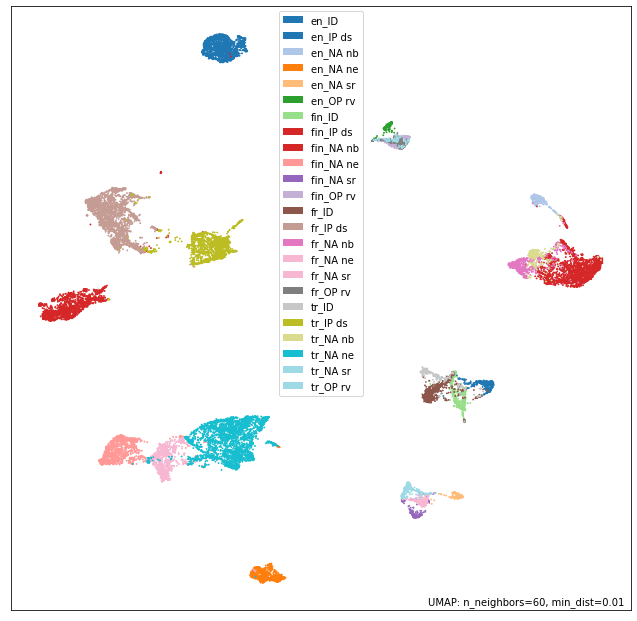

In [48]:
import umap.plot
umap.plot.points(fitter, labels=df["Labels"], color_key_cmap='tab20')#, theme='fire')

In [49]:
hover_data = df

In [50]:
umap.plot.output_notebook()

Loading BokehJS ...

In [51]:
p = umap.plot.interactive(fitter, labels=df["Labels"], color_key_cmap='tab20', hover_data=hover_data, point_size=2)
umap.plot.show(p)